<a href="https://colab.research.google.com/github/MohanR007/Brain-Tumor-Detection/blob/main/brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN - Convulated Neural Network

# The three important layers are


*   INL - input layer
*   HL - hidden layer
*   OL - output layer



In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# nopath='/content/drive/MyDrive/brain_tumor_dataset1/no/1 no.jpeg'

In [3]:
nopath='brain_tumor_dataset/no/1 no.jpeg'
yespath='brain_tumor_dataset/yes/Y1.jpg'

In [4]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray

In [5]:
noi=Image.open(nopath)
yoi=Image.open(yespath)

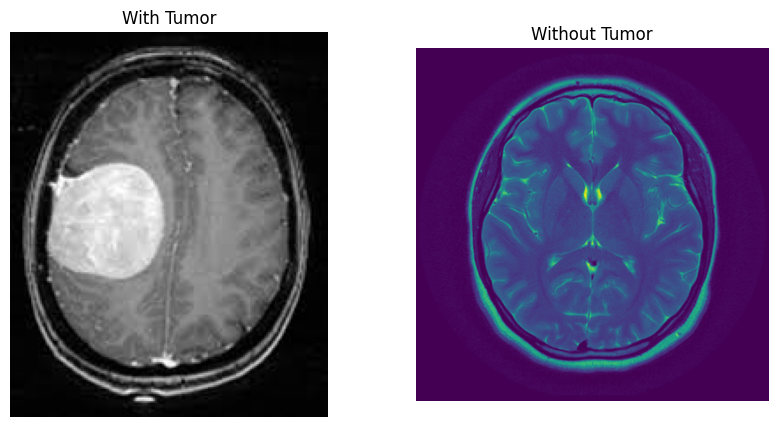

In [6]:
# Plot images side by side
plt.figure(figsize=(10, 5))

# Plot tumor image
plt.subplot(1, 2, 1)
plt.imshow(yoi)
plt.title("With Tumor")
plt.axis('off')

# Plot no tumor image
plt.subplot(1, 2, 2)
plt.imshow(noi)
plt.title("Without Tumor")
plt.axis('off')

plt.show()

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Path to your dataset
# dataset_path = '/content/drive/My Drive/brain_tumor_dataset1'
dataset_path = 'brain_tumor_dataset'
yes_path = os.path.join(dataset_path, 'yes')
no_path = os.path.join(dataset_path, 'no')

In [8]:
img_height, img_width = 224, 224
batch_size = 32

# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
#training set
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)
# testing set
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


c:\Users\mohan\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:

# Train the model without early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10,  # Number of epochs to train for
    validation_data=validation_generator
)


c:\Users\mohan\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5894 - loss: 1.5853 - val_accuracy: 0.7500 - val_loss: 0.5890
Epoch 2/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6250 - loss: 0.6280

c:\Users\mohan\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.6250 - loss: 0.6280 - val_accuracy: 0.7812 - val_loss: 0.5395
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7081 - loss: 0.5778 - val_accuracy: 0.7500 - val_loss: 0.5360
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7812 - loss: 0.4353 - val_accuracy: 0.6562 - val_loss: 0.6664
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8334 - loss: 0.4029 - val_accuracy: 0.7500 - val_loss: 0.5175
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.7500 - loss: 0.6214 - val_accuracy: 0.6875 - val_loss: 0.5536
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7501 - loss: 0.5274 - val_accuracy: 0.7812 - val_loss: 0.5739
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.8750 - loss: 0.4518 - val_accuracy: 0.7500 - val_loss: 0.5326
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8697 - loss: 0.3834 - val_accuracy: 0.6875 - val_loss: 0.5490
Epoch 10/10

In [11]:
# model.save('/content/drive/My Drive/brain_tumor_cnn_model.h5')
model.save('brain_tumor_cnn_model.h5')


In [12]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('brain_tumor_cnn_model.h5')


In [13]:
# notest='/content/drive/MyDrive/brain_tumor_dataset/no/15 no.jpg'
notest='brain_tumor_dataset/no/15 no.jpg'

In [14]:
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(image_path, img_height=224, img_width=224):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale the image (same as during training)
    return img_array


In [15]:
img=load_and_preprocess_image(notest,224,224)

In [16]:
def predict_image(model, image_path):
    img_array = load_and_preprocess_image(image_path)
    prediction = model.predict(img_array)
    return prediction


In [17]:
prediction=predict_image(model,notest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


In [18]:
def display_prediction(image_path, prediction):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')

    # Use argmax to find the index of the highest probability
    prediction_class = np.argmax(prediction, axis=-1)
    class_label = 'Tumor' if prediction_class == 1 else 'No Tumor'

    plt.title(f"Prediction: {class_label}")
    plt.show()


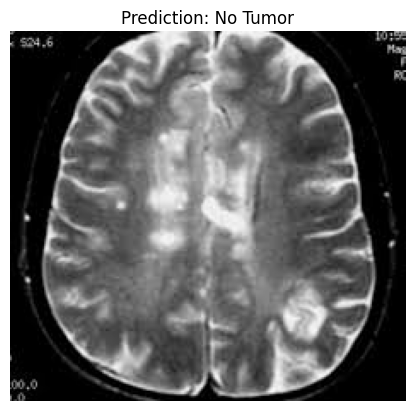

In [19]:
display_prediction(notest,prediction)

In [20]:
def load_and_preprocess_image(img, img_height=224, img_width=224):
    img = img.resize((img_height, img_width))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array



In [21]:
def predict_image(image):
    img_array = load_and_preprocess_image(image)
    prediction = model.predict(img_array)
    print("Raw model prediction:", prediction)

    if prediction.shape[1] == 1:
        class_label = 'Tumor Detected      ♋  ❤️‍🩹 🙏' if prediction[0][0] >= 0.5 else 'No Tumor'
    else:
        prediction_class = np.argmax(prediction, axis=-1)
        class_label = 'Tumor Detected      ♋  ❤️‍🩹 🙏' if prediction_class == 1 else 'No Tumor'

    return class_label




In [22]:
import gradio as gr
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type='pil'),
    outputs=gr.Textbox()
)

In [ ]:
# Launch the interface
interface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Raw model prediction: [[0.963675]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Raw model prediction: [[0.0398928]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
Raw model prediction: [[0.963675]]
